In [ ]:
# 验证 delta_T
from utils.train_func import train_func
from datetime import datetime
from tqdm import tqdm
import numpy as np

modelList = ['SeEANet', 'SAT', 'MyoNet']
data_dict = {}
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
delta_Tlist = [1, 5, 10, 20, 30, 40, 60, 80 ,100, 120, 150, 200]

rmseL = []
maeL = []
r2L = []
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")

for delta_T in tqdm(delta_Tlist, desc="Processing", position=0):
    rmse, mae, r2 = train_func(modelName='SAN', epochs=1500, train_num=5, delta_T=delta_T,
                               formatted_time = formatted_time)
    rmse = np.array(rmse)
    rmse_m = np.mean(rmse,axis=0)
    rmse_s = np.std(rmse, axis=0)
    rmse_d = np.max(rmse, axis=0)-np.min(rmse, axis=0)
    rmseL.append(rmse_m)

    mae = np.array(mae)
    mae_m = np.mean(mae,axis=0)
    mae_s = np.std(mae, axis=0)
    mae_d = np.max(mae, axis=0)-np.min(mae, axis=0)
    maeL.append(mae_m)

    r2 = np.array(r2)
    r2_m = np.mean(r2,axis=0)
    r2_s = np.std(r2, axis=0)
    r2_d = np.max(r2, axis=0)-np.min(r2, axis=0)
    r2L.append(r2_m)

    data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
    data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
    data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]


In [14]:
type(list(rmse_m))

list

In [17]:
import json
import numpy as np
import os
# 指定 JSON 文件路径
file_path = os.path.join('/home/admin123/SATData/Run', formatted_time+"_data.json")

data_dict = {}

data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]
# 将 NumPy 数组转换为列表



with open(file_path, "w", encoding="utf-8") as file:
    json.dump(data_dict, file, ensure_ascii=False, indent=4)

print(f"字典已成功保存到 {file_path}")

字典已成功保存到 /home/admin123/SATData/Run/04-14-17:01:37_data.json


In [5]:
data_dict[f"rmse_{delta_T}"] = [rmse_m, rmse_s, rmse_d]
data_dict[f"mae_{delta_T}"] = [mae_m, mae_s, mae_d]
data_dict[f"r2_{delta_T}"] = [r2_m, r2_s, r2_d]

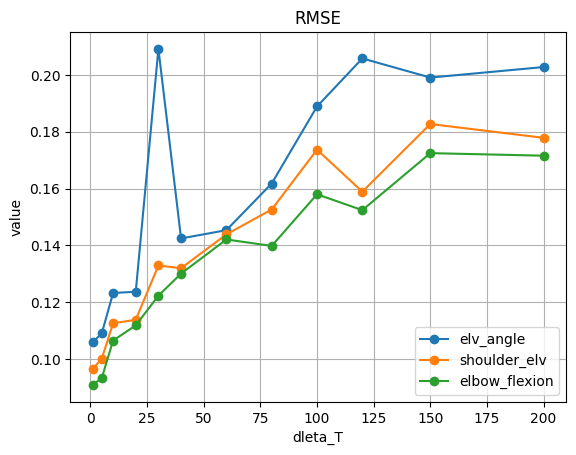

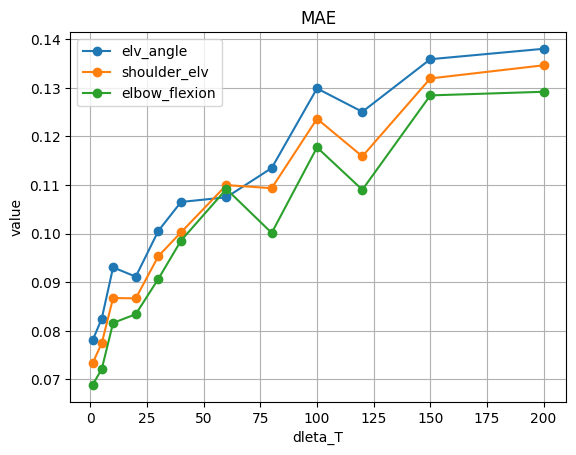

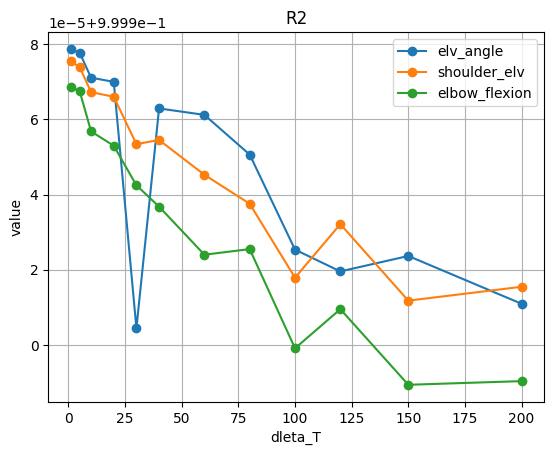

In [3]:
import matplotlib.pyplot as plt
rmseL = np.array(rmseL)
maeL = np.array(maeL)
r2L = np.array(r2L)

plt.figure()
plt.plot(delta_Tlist, rmseL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.grid()
plt.legend()
plt.title("RMSE")
# plt.scatter(x, y, color='r', label='Points')  # 单独绘制点 


plt.figure()
plt.plot(delta_Tlist, maeL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, maeL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, maeL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.title("MAE")
plt.grid()
plt.legend()


plt.figure()
plt.plot(delta_Tlist, r2L[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, r2L[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, r2L[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.title("R2")
plt.grid()
plt.legend()

In [4]:
data_dict

{'rmse_1': (array([0.10602448, 0.09660612, 0.09103374]),
  array([0.00857304, 0.00576403, 0.00467388]),
  array([0.01820745, 0.01403671, 0.0111519 ])),
 'mae_1': (array([0.07807923, 0.07339799, 0.06889719]),
  array([0.00527498, 0.00400893, 0.00387388]),
  array([0.01257128, 0.00947644, 0.009477  ])),
 'r2_1': (array([0.99997882, 0.99997552, 0.99996875]),
  array([4.04765815e-06, 2.65684914e-06, 3.22869191e-06]),
  array([9.29832458e-06, 6.49690628e-06, 7.74860382e-06])),
 'rmse_5': (array([0.10906204, 0.10020093, 0.09336413]),
  array([0.00200117, 0.00185817, 0.0034008 ]),
  array([0.00487728, 0.00451032, 0.00809433])),
 'mae_5': (array([0.08252044, 0.07744282, 0.07214584]),
  array([0.00194682, 0.0018772 , 0.00315323]),
  array([0.00466934, 0.00459661, 0.00767753])),
 'r2_5': (array([0.99997769, 0.99997389, 0.99996746]),
  array([9.41594093e-07, 1.00565360e-06, 1.85701393e-06]),
  array([2.02655792e-06, 2.44379044e-06, 4.05311584e-06])),
 'rmse_10': (array([0.12329431, 0.11264825, 0.

In [ ]:
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
rmseL = np.array([
    [0.10237296, 0.09396917, 0.09077574],
    [0.0939072, 0.08483645, 0.07955739],
    [0.10914786, 0.0958618, 0.09051707],
    [0.11021526, 0.09803324, 0.09316997],
    [0.10227798, 0.09622285, 0.09042546],
    [0.11708251, 0.12094003, 0.10912295],
    [0.12634511, 0.11113966, 0.10844835],
    [0.15277019, 0.12197829, 0.11180878],
    [0.13988891, 0.13063756, 0.12429301]])

maeL = np.array([
    [0.07286412, 0.0701846, 0.0701846],
    [0.06653097, 0.06401513, 0.06401513],
    [0.07445034, 0.07197498, 0.07197498],
    [0.07616316, 0.07359703, 0.07359703],
    [0.07206213, 0.07030632, 0.07030632],
    [0.08084937, 0.0797092, 0.0797092],
    [0.08395319, 0.08070797, 0.08070797],
    [0.08722488, 0.08560005, 0.08560005],
    [0.09613641, 0.09793096, 0.09793096]])


r2L = np.arary([
    [0.99997987, 0.9999763, 0.9999763],
    [0.9999832, 0.99998108, 0.99998108],
    [0.99997828, 0.99997597, 0.99997597],
    [0.99997785, 0.99997488, 0.99997488],
    [0.9999809, 0.99997578, 0.99997578],
    [0.99997439, 0.99996037, 0.99996037],
    [0.99997033, 0.99996723, 0.99996723],
    [0.99995638, 0.99996102, 0.99996102],
    [0.99996225, 0.99995481, 0.99995481]])

[array([0.10237296, 0.09396917, 0.09077574]),
 array([0.0939072 , 0.08483645, 0.07955739]),
 array([0.10914786, 0.0958618 , 0.09051707]),
 array([0.11021526, 0.09803324, 0.09316997]),
 array([0.10227798, 0.09622285, 0.09042546]),
 array([0.11708251, 0.12094003, 0.10912295]),
 array([0.12634511, 0.11113966, 0.10844835]),
 array([0.15277019, 0.12197829, 0.11180878]),
 array([0.13988891, 0.13063756, 0.12429301])]

[array([0.07286412, 0.0701846 , 0.0701846 ]),
 array([0.06653097, 0.06401513, 0.06401513]),
 array([0.07445034, 0.07197498, 0.07197498]),
 array([0.07616316, 0.07359703, 0.07359703]),
 array([0.07206213, 0.07030632, 0.07030632]),
 array([0.08084937, 0.0797092 , 0.0797092 ]),
 array([0.08395319, 0.08070797, 0.08070797]),
 array([0.08722488, 0.08560005, 0.08560005]),
 array([0.09613641, 0.09793096, 0.09793096])]

[array([0.99997987, 0.9999763 , 0.9999763 ]),
 array([0.9999832 , 0.99998108, 0.99998108]),
 array([0.99997828, 0.99997597, 0.99997597]),
 array([0.99997785, 0.99997488, 0.99997488]),
 array([0.9999809 , 0.99997578, 0.99997578]),
 array([0.99997439, 0.99996037, 0.99996037]),
 array([0.99997033, 0.99996723, 0.99996723]),
 array([0.99995638, 0.99996102, 0.99996102]),
 array([0.99996225, 0.99995481, 0.99995481])]